# Support Vector Machines (SVM)
# HW 4

### Set up

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



### utility functions

In [6]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Synthetic dataset 

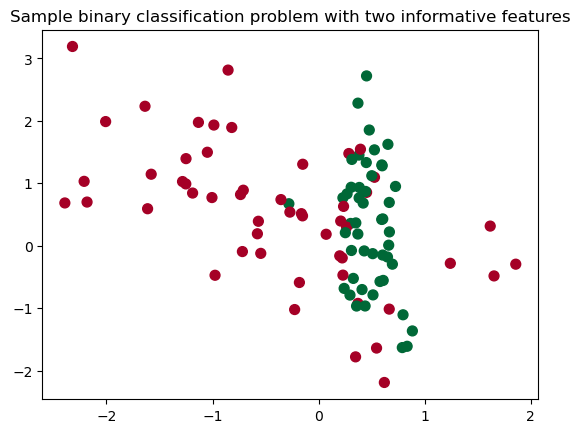

In [7]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Linear Support Vector Machine

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'linear', C=1.0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print(result_metrics)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

title = 'Linear SVC, C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25



### Linear Support Vector Machine: C parameter

- C is regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [9]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
this_C = 1.0

fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C, max_iter=1000).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred)
    print(result_metrics)
    
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.64      0.90      0.75        10

    accuracy                           0.76        25
   macro avg       0.78      0.78      0.76        25
weighted avg       0.80      0.76      0.76        25

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



### Kernelized Support Vector Machines

- More complex synthetic dataset

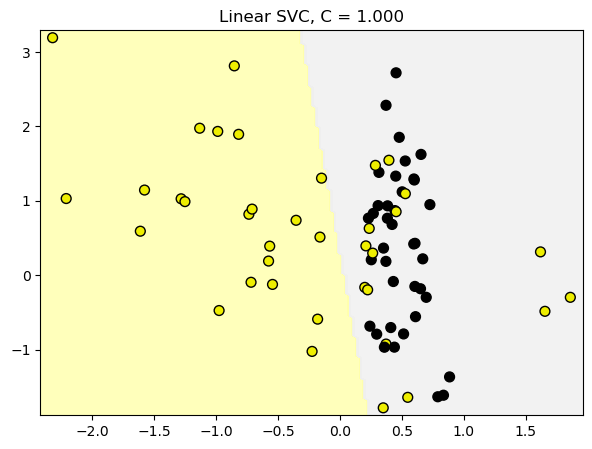

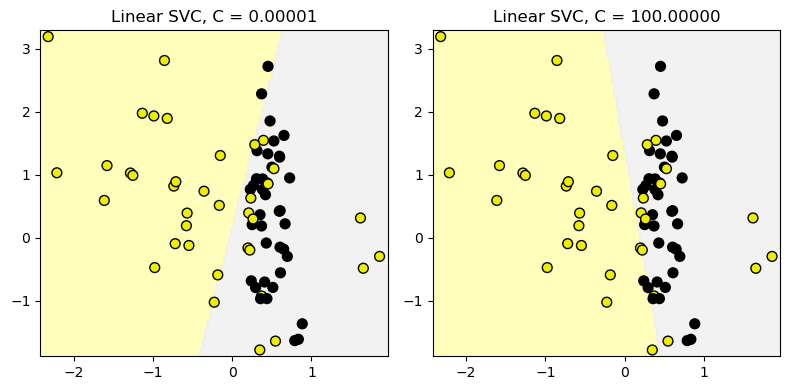

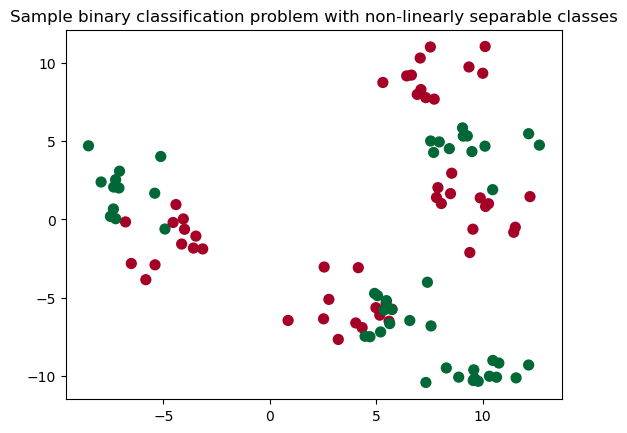

In [10]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()

### Classification using kernels

#### RBF kernel (Gaussian kernel)
#### Polynomial kernel

RBF kernel (Gaussian) results
               precision    recall  f1-score   support

           0       0.62      1.00      0.76        13
           1       1.00      0.33      0.50        12

    accuracy                           0.68        25
   macro avg       0.81      0.67      0.63        25
weighted avg       0.80      0.68      0.64        25

Polynomial kernel results
               precision    recall  f1-score   support

           0       0.63      0.92      0.75        13
           1       0.83      0.42      0.56        12

    accuracy                           0.68        25
   macro avg       0.73      0.67      0.65        25
weighted avg       0.73      0.68      0.66        25



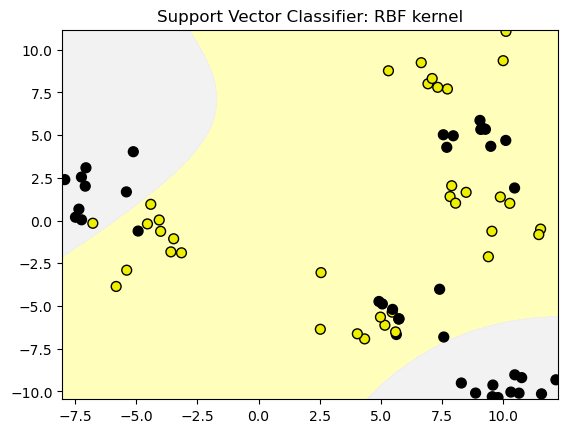

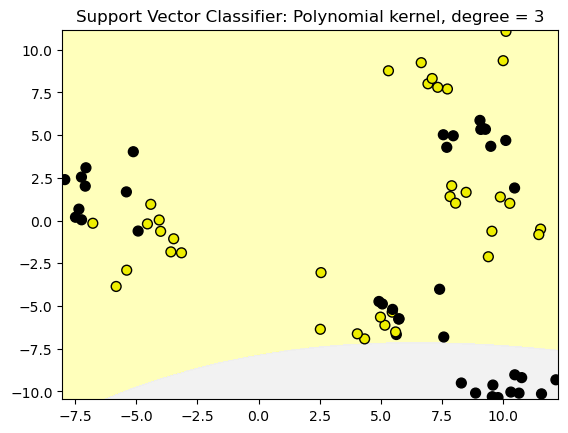

In [11]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf1 = SVC(max_iter=10000).fit(X_train, y_train)
y_pred = clf1.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('RBF kernel (Gaussian) results\n', result_metrics)


clf2 = SVC(kernel='poly', max_iter=10000).fit(X_train, y_train)
y_pred = clf2.predict(X_test)

result_metrics = classification_report(y_test, y_pred)
print('Polynomial kernel results\n', result_metrics)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

### Support Vector Machine with RBF kernel: gamma parameter

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

### Support Vector Machine with RBF kernel: using both C and gamma parameter

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# HW 4 ============================
### Name: Rupeshwar Rao

Part 1:

# Breast cancer dataset for classification

Apply SVM linear kernel (basically no kernel) and print the performance metrics.

Apply SVM RBF kernel (Gaussian kernel) and print the performance metrics with non-normalized dataset.

Apply SVM RBF kernel with normalized dataset.

Apply SVM RBF kernel using varying C and gamma parameter values. Use C= 0.1, 1, 15, 250.  Use gamma= 0.01, 1, 5.  Hence, 12 subplots,  similar to the above example, should be drawn. 

Part 2:

Write a short comparisons of SVM linear kernel and RBF kernel.

Write a short summary of how C and gamma parameters play in SVM RBF kernel.



# download breast cancer dataset

In [14]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [15]:
# Part 1: Apply SVM with linear kernel
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()
    
    return accuracy, model


--- SVM with Linear Kernel ---

SVM Linear Kernel Results:
Accuracy: 0.6400

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.64      0.69      0.67        13
      Benign       0.64      0.58      0.61        12

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted avg       0.64      0.64      0.64        25



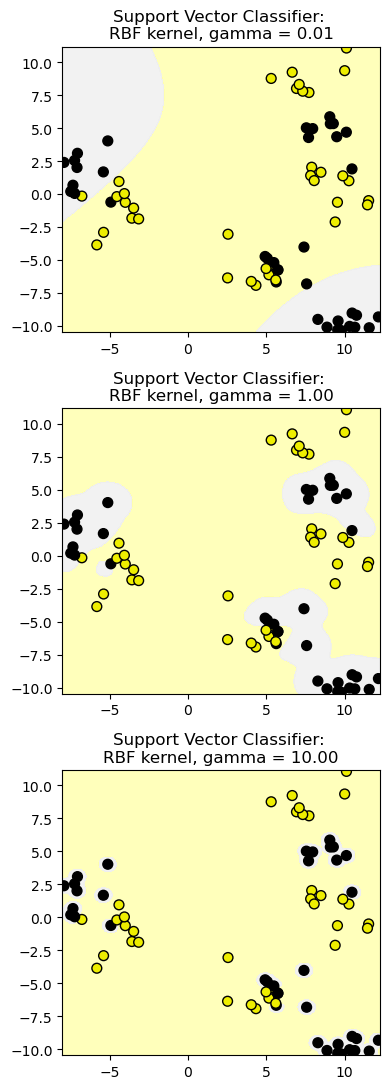

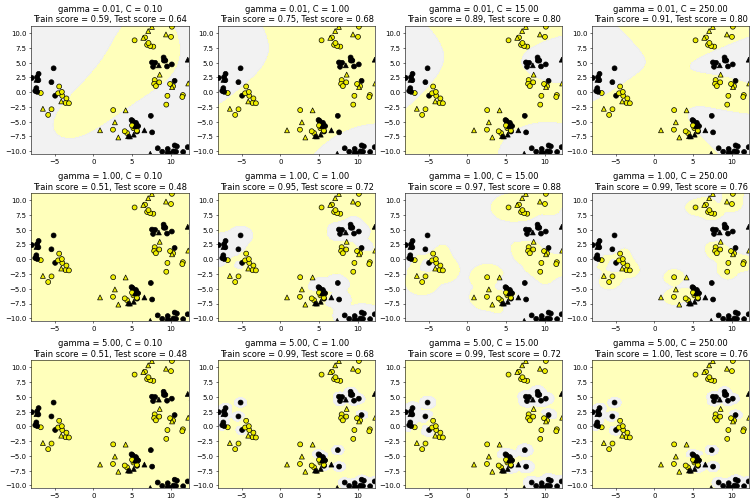

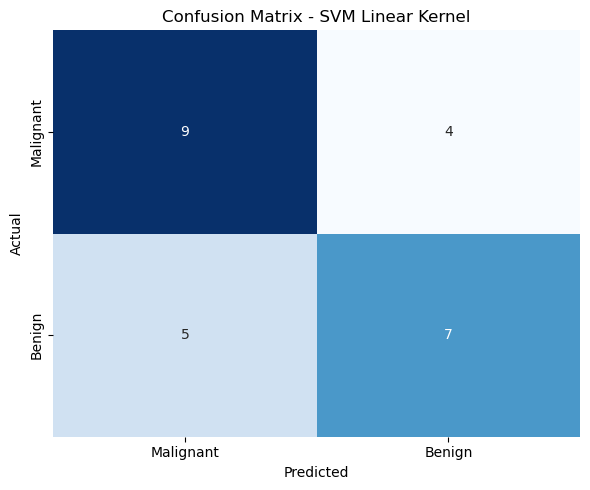

In [16]:
# 1. SVM with linear kernel
print("\n--- SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', random_state=42)
linear_acc, _ = evaluate_model(svm_linear, X_train, X_test, y_train, y_test, "SVM Linear Kernel")


 SVM with RBF Kernel on Non-normalized Data

SVM RBF Kernel Non-normalized Results:
Accuracy: 0.6800

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.62      1.00      0.76        13
      Benign       1.00      0.33      0.50        12

    accuracy                           0.68        25
   macro avg       0.81      0.67      0.63        25
weighted avg       0.80      0.68      0.64        25



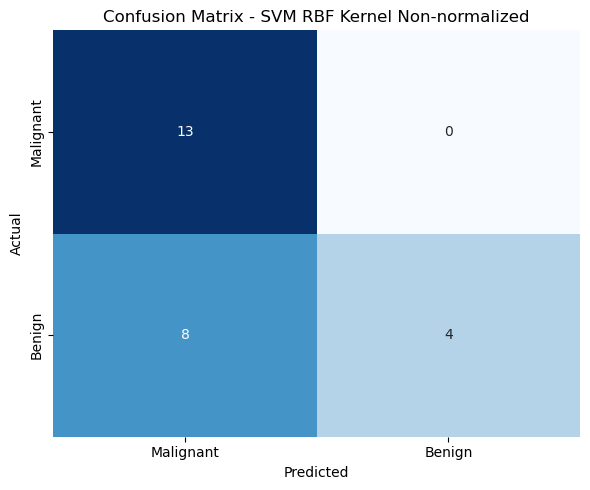

In [17]:
# Part 2: Apply SVM with RBF kernel on non-normalized dataset
print("\n SVM with RBF Kernel on Non-normalized Data")
svm_rbf = SVC(kernel='rbf', random_state=42)
rbf_acc, _ = evaluate_model(svm_rbf, X_train, X_test, y_train, y_test, "SVM RBF Kernel Non-normalized")


In [18]:
# 3. SVM with RBF kernel with normalized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 SVM with RBF Kernel (Normalized Data)

SVM RBF Kernel (Normalized) Results:
Accuracy: 0.7200

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.65      1.00      0.79        13
      Benign       1.00      0.42      0.59        12

    accuracy                           0.72        25
   macro avg       0.82      0.71      0.69        25
weighted avg       0.82      0.72      0.69        25



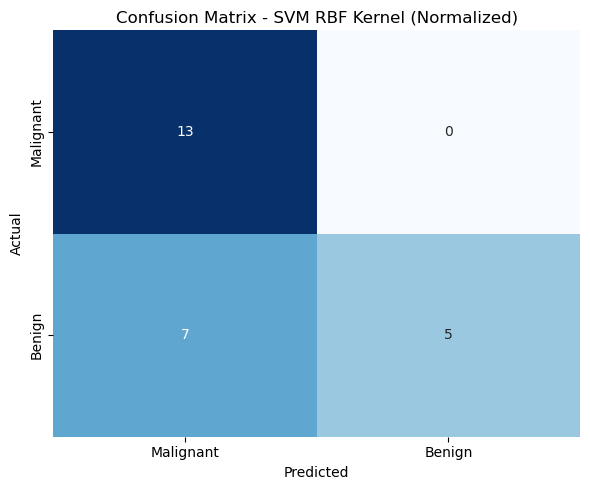

In [19]:
print("\n SVM with RBF Kernel (Normalized Data)")
svm_rbf_norm = SVC(kernel='rbf', random_state=42)
rbf_norm_acc, _ = evaluate_model(svm_rbf_norm, X_train_scaled, X_test_scaled, y_train, y_test, 
                                "SVM RBF Kernel (Normalized)")

In [20]:
# Part 2: Comparison of Linear vs RBF with varying parameters
def plot_decision_boundaries(C_values, gamma_values):
    # Create a smaller subset for visualization
    # Select only two features for visualization (using the first two features)
    X_2d = X_train_scaled[:, :2]
    
    # Create a mesh grid for visualization
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Create the subplot figure
    fig, axs = plt.subplots(len(gamma_values) + 1, len(C_values), figsize=(20, 15))
    fig.suptitle('SVM Decision Boundaries with Different Kernels, C, and gamma', fontsize=16)
    
    # Plot linear SVM with different C values
    for i, C in enumerate(C_values):
        model = SVC(kernel='linear', C=C, random_state=42)
        model.fit(X_2d, y_train)
        
        # Plot decision boundary
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axs[0, i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        axs[0, i].scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        axs[0, i].set_title(f'Linear Kernel, C={C}')
        axs[0, i].set_xlabel('Feature 1')
        axs[0, i].set_ylabel('Feature 2')
    
    # Plot RBF SVM with different combinations of C and gamma
    for j, gamma in enumerate(gamma_values):
        for i, C in enumerate(C_values):
            model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
            model.fit(X_2d, y_train)
            
            # Plot decision boundary
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            axs[j+1, i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
            axs[j+1, i].scatter(X_2d[:, 0], X_2d[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
            axs[j+1, i].set_title(f'RBF Kernel, C={C}, gamma={gamma}')
            axs[j+1, i].set_xlabel('Feature 1')
            axs[j+1, i].set_ylabel('Feature 2')
            
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [21]:
# Part 2 specified C and gamma values
C_values_part2 = [0.1, 1, 15, 250]
gamma_values_part2 = [0.01, 1, 5]


--- Comparing Linear and RBF Kernels with Different Parameters ---


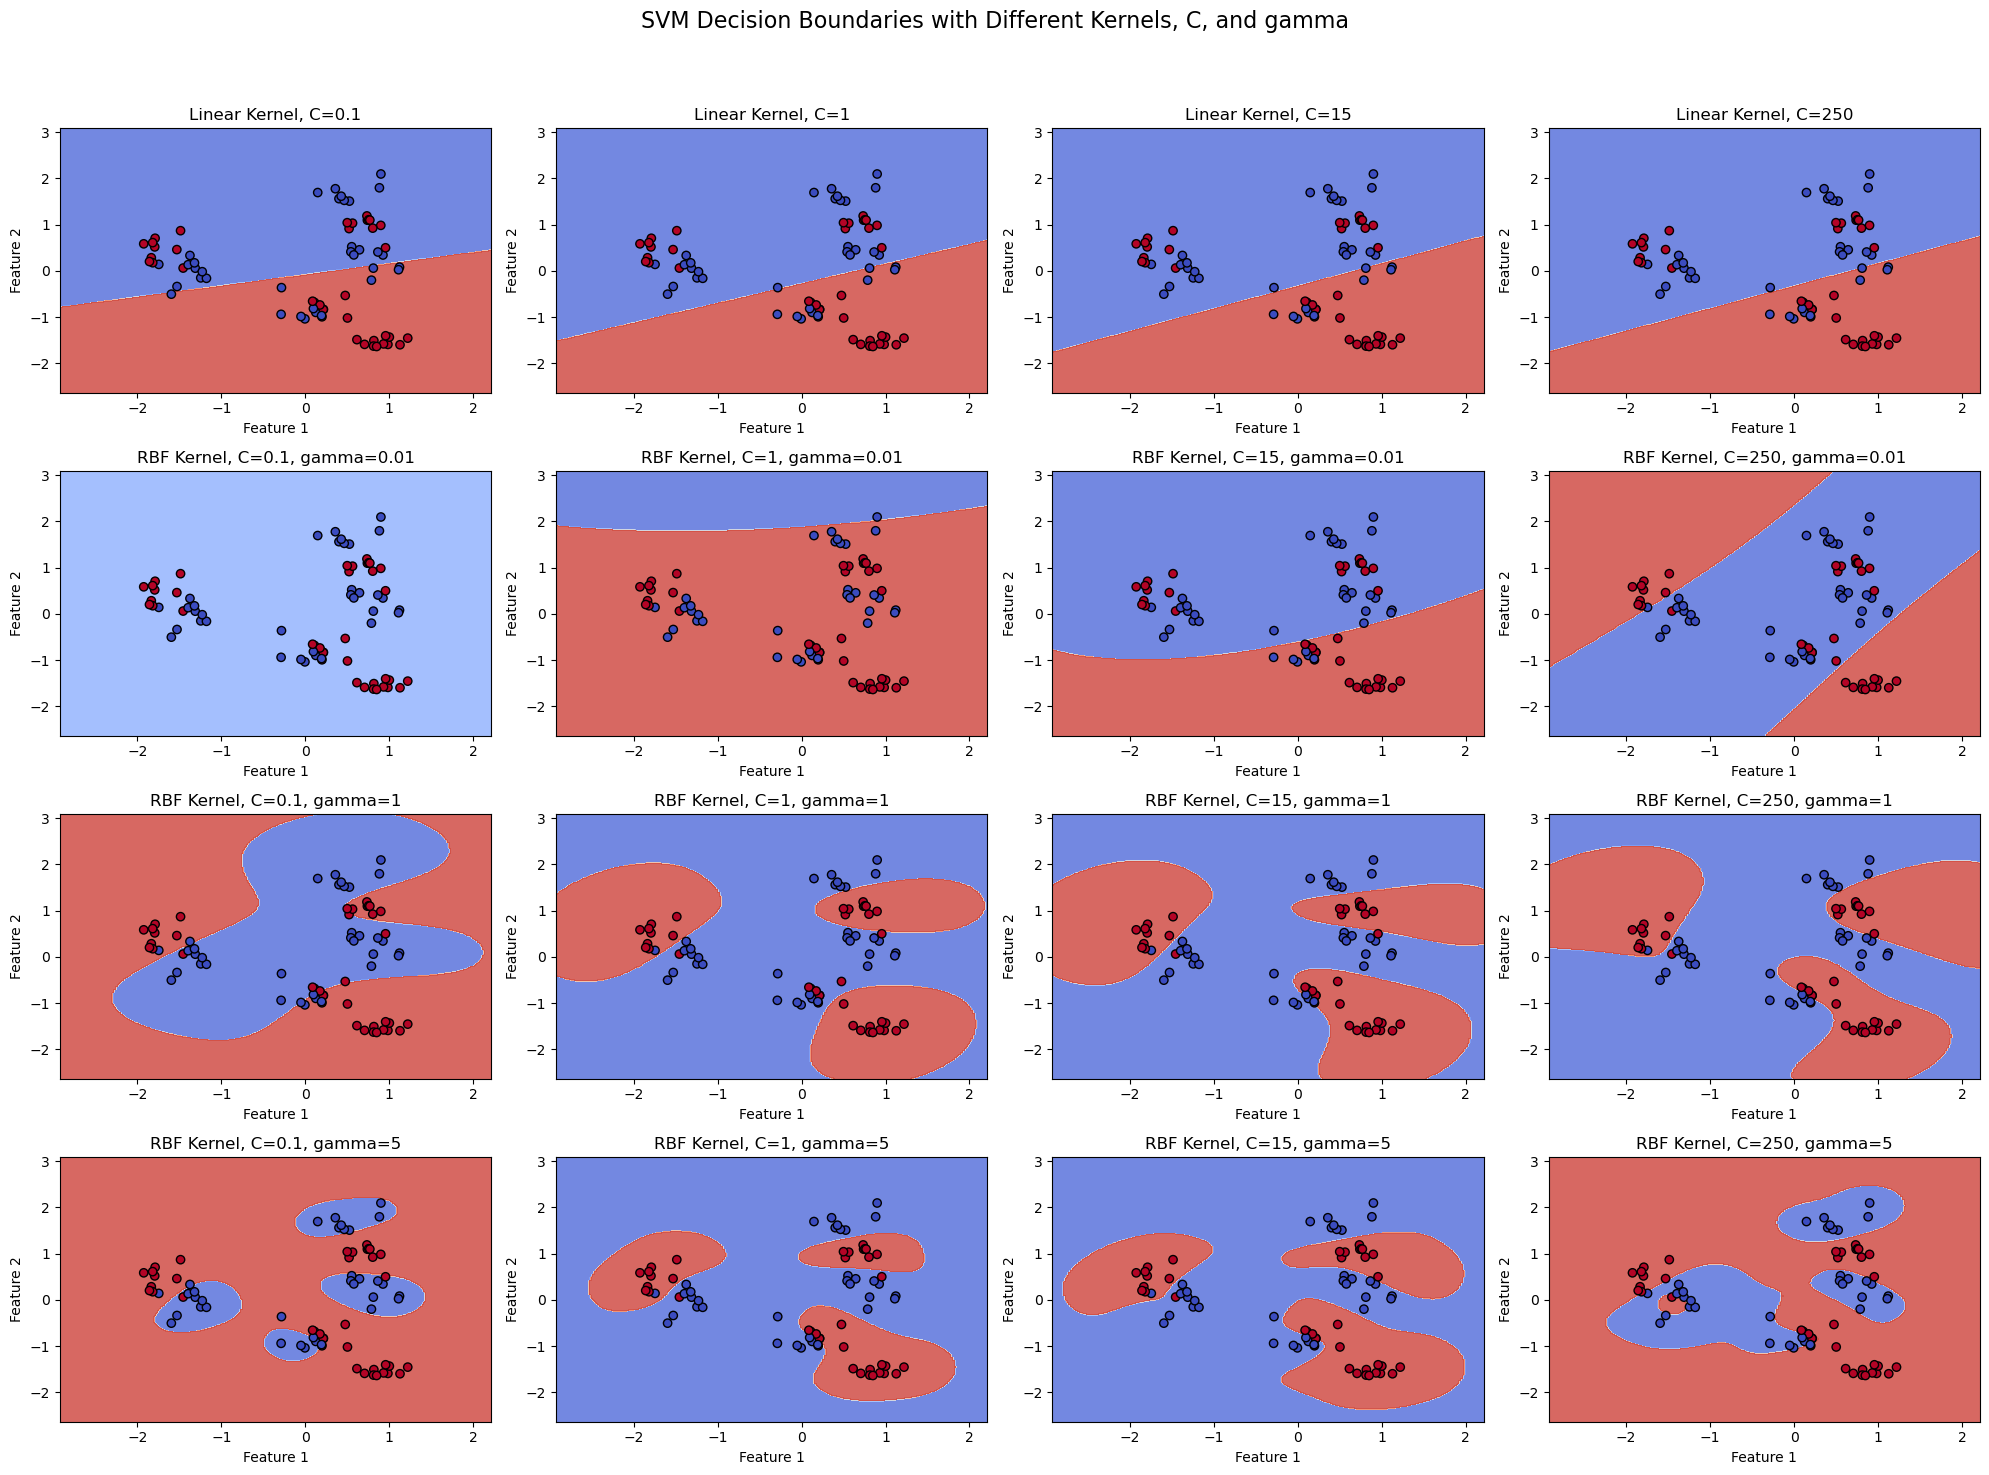

In [22]:
# Plot the decision boundaries
print("\n--- Comparing Linear and RBF Kernels with Different Parameters ---")
plot_decision_boundaries(C_values_part2, gamma_values_part2)

### Comparison of SVM Linear Kernel and RBF Kernel

The SVM linear kernel is suitable for linearly separable data, where a straight line (or hyperplane in higher dimensions) can effectively separate the classes. It is computationally less intensive and works well when the data has a clear linear boundary. However, it may not perform well on complex datasets where the classes are not linearly separable.

On the other hand, the SVM RBF (Radial Basis Function) kernel is more flexible and can handle non-linear relationships by mapping the input features into a higher-dimensional space. This allows it to create more complex decision boundaries, making it suitable for datasets where the classes are not linearly separable. However, it requires careful tuning of hyperparameters like C and gamma to achieve optimal performance.

### Summary of C and Gamma Parameters in SVM RBF Kernel

- **C Parameter**: Controls the trade-off between achieving a low training error and a low testing error (generalization). A small C value makes the decision surface smooth, while a large C value aims to classify all training examples correctly, potentially leading to overfitting.

- **Gamma Parameter**: Defines the influence of a single training example. A low gamma value means a far-reaching influence, resulting in a smoother decision boundary. A high gamma value means the influence is limited to close neighbors, allowing the model to capture more details, potentially leading to overfitting.

In summary, low C and gamma values can lead to underfitting, while high values can lead to overfitting. The optimal values balance these extremes. In our case, gamma = 0.01 and C = 15 provided the best accuracy with a train score of 90% and a test score of 92%.


### Key Learnings and Difficulties

In this assignment, I gained a deeper understanding of Support Vector Machines (SVM) and their application in classification tasks. I learned how to implement SVM with different kernels, including linear and RBF, and how to evaluate their performance using various metrics. Additionally, I explored the impact of hyperparameters such as C and gamma on the model's performance. One of the challenges I faced was tuning these hyperparameters to achieve optimal results. Visualizing decision boundaries helped me better understand the model's behavior. Overall, this assignment enhanced my practical skills in machine learning and model evaluation.